,timestamp,open,high,low,close,adjusted close,volume,dividend amount
0,2023-11-07,28.0500,29.1800,27.8800,28.9800,28.9800,78797700,0.0000
1,2023-11-03,27.4900,28.1100,26.6600,27.9300,27.9300,102037500,0.0176
2,2023-10-27,26.9000,27.9000,26.8200,27.3000,27.2820,116410500,0.0000
3,2023-10-20,27.8800,27.9000,26.5800,26.9600,26.9424,141131700,0.0000
4,2023-10-13,27.6500,28.0900,27.4000,27.6900,27.6720,77340100,0.0000
...,...,...,...,...,...,...,...,...
986,2005-02-11,430.0002,438.0024,426.9987,432.8991,3.2190,637399594,0.0000
987,2005-02-04,384.4994,440.0015,384.4994,438.0024,3.2570,894557778,0.0024
988,2005-01-28,386.9996,392.0003,375.5004,378.9974,2.8172,864360715,0.0000
989,2005-01-21,397.9007,402.9920,386.0997,389.5001,2.8953,847329571,0.0000


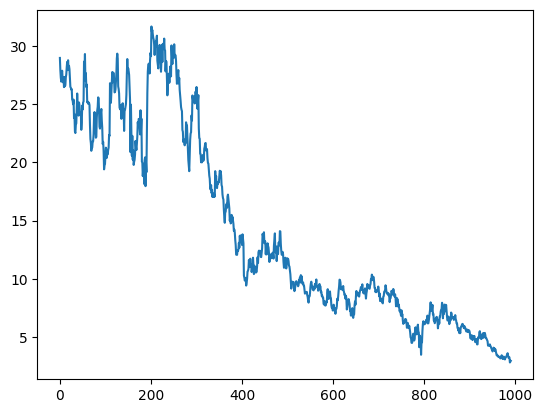

In [ ]:
#Faz cotação de uma ação entre um periodo 

import requests

import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt

apikey = "G3W8YCWANLI6EFQP"
acoes = ['ITUB4']

compilada = pd.DataFrame()

for acao in acoes:
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY_ADJUSTED&symbol={acao}.SAO&apikey={apikey}&datatype=csv'
    r = requests.get(url)
    tabela = pd.read_csv(StringIO(r.text))
    lista_tabelas = [compilada, tabela]
    compilada = pd.concat(lista_tabelas)
display(compilada)
compilada['adjusted close'].plot()
plt.show()


In [ ]:
import asyncio
from alpha_vantage.async_support.timeseries import TimeSeries

symbols = ['AAPL', 'GOOG', 'TSLA', 'MSFT']

apikey = "G3W8YCWANLI6EFQP"
async def get_data(symbol):
    ts = TimeSeries(key=apikey)
    data, _ = await ts.get_quote_endpoint(symbol)
    await ts.close()
    return data

loop = asyncio.get_event_loop()
tasks = [get_data(symbol) for symbol in symbols]
group1 = asyncio.gather(*tasks)
results = loop.run_until_complete(group1)
loop.close()
print(results)

In [54]:
#Faz cotação de ações no ultimo dia

acoes = ['ITUB4','ABEV3', 'BBAS3', 'MGLU3']

compilada = pd.DataFrame()

for acao in acoes:
    url = f'https://www.alphavantage.co/query?function=GLOBAL_QUOTE&symbol={acao}.SAO&apikey=Q33THIRLL4UVF1EN&datatype=csv'
    r = requests.get(url)
    tabela = pd.read_csv(StringIO(r.text))
    lista_tabelas = [compilada, tabela]
    compilada = pd.concat(lista_tabelas)
display(compilada)

,symbol,open,high,low,price,volume,latestDay,previousClose,change,changePercent
0,ITUB4.SAO,28.19,29.18,27.95,28.98,60774300,2023-11-07,28.19,0.79,2.8024%
0,ABEV3.SAO,13.50,13.59,13.46,13.57,20565500,2023-11-07,13.51,0.06,0.4441%
0,BBAS3.SAO,50.45,51.19,50.13,51.02,14527500,2023-11-07,50.45,0.57,1.1298%
0,MGLU3.SAO,1.42,1.78,1.41,1.77,298872500,2023-11-07,1.43,0.34,23.7762%
